**Exploratory Data Analysis (EDA)**:

In [9]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


In [3]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e7/train.csv", low_memory=False)
df_test = pd.read_csv("/kaggle/input/playground-series-s4e7/test.csv", low_memory=False)

In [4]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [11]:
print(df_train.shape)
print(df_test.shape)

(11504798, 12)
(7669866, 11)


In [5]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [6]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [7]:
df_train.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


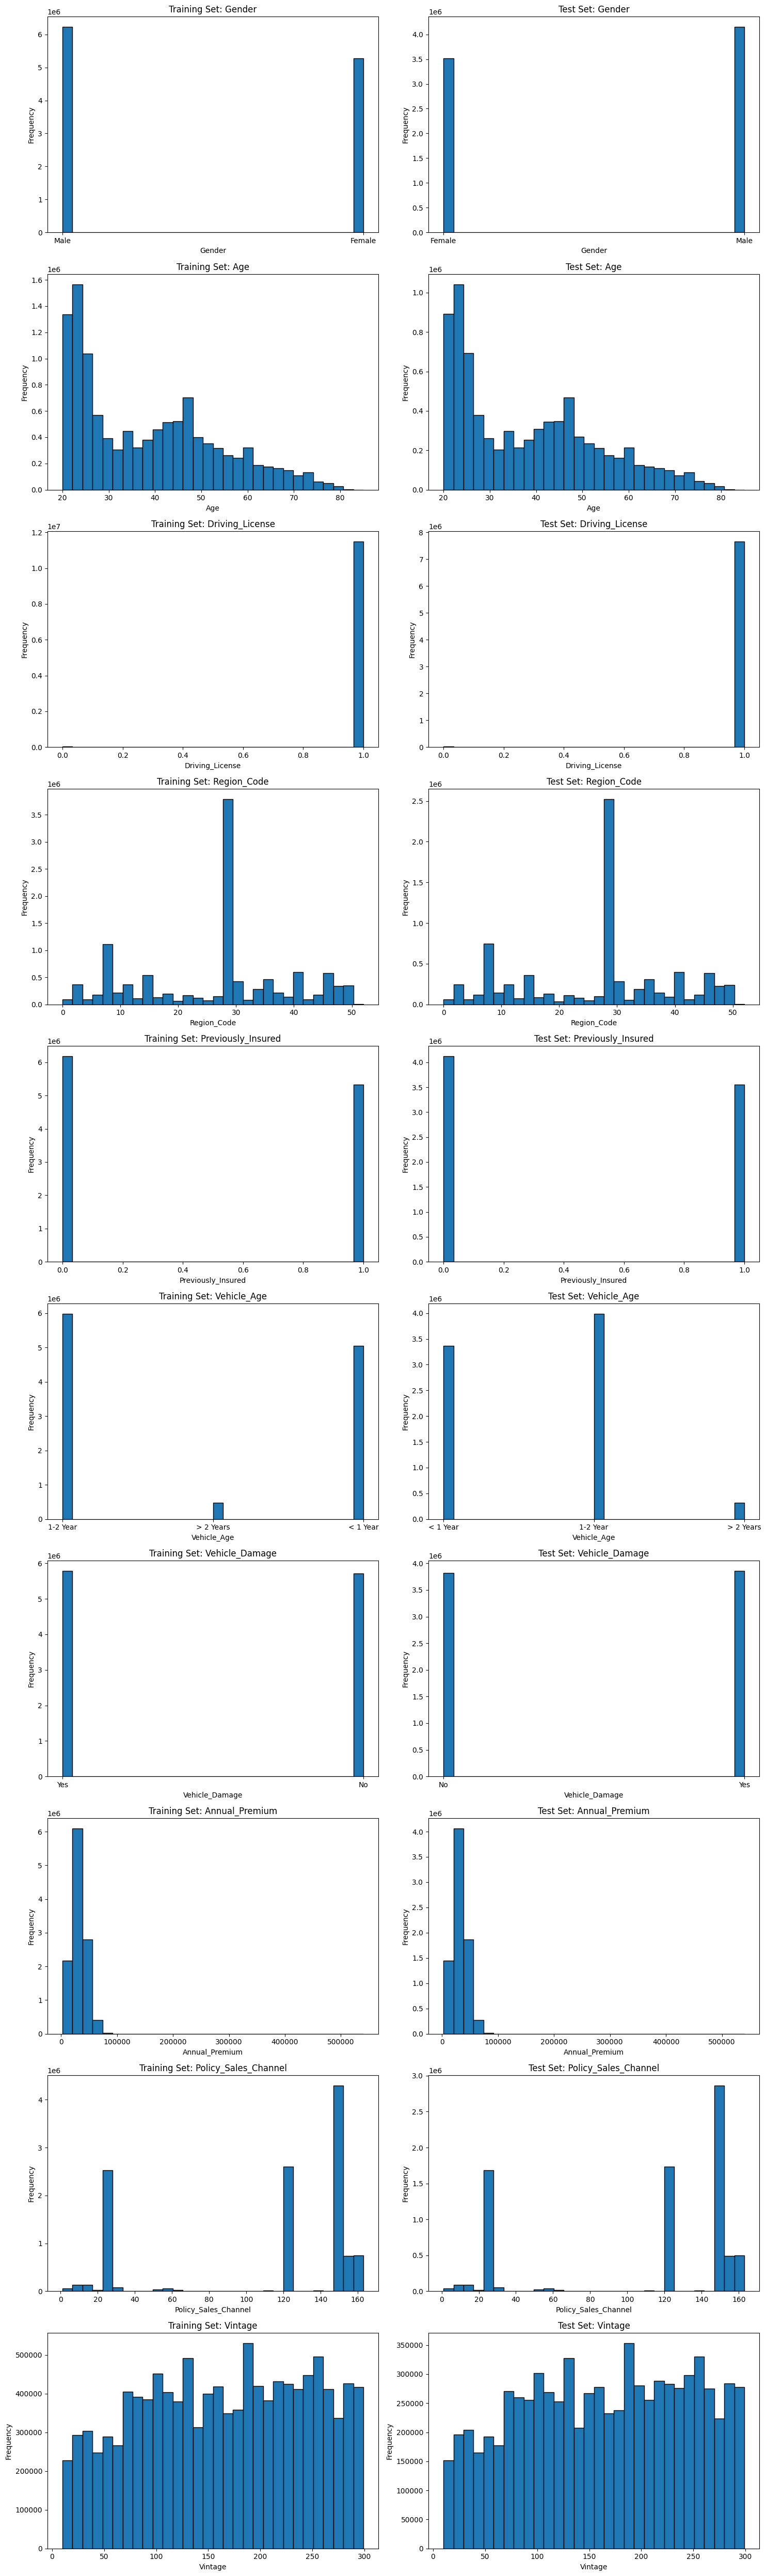

In [10]:
# Exclude the Response column from comparison
columns_to_compare = [col for col in df_train.columns if col != 'Response' and col != 'id']

# Create a grid of subplots
n_cols = 2
n_rows = len(columns_to_compare)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for i, column in enumerate(columns_to_compare):
    # Plot df_train column
    ax_train = axes[i, 0]
    ax_train.hist(df_train[column].dropna(), bins=30, edgecolor='k')
    ax_train.set_title(f'Training Set: {column}')
    ax_train.set_xlabel(column)
    ax_train.set_ylabel('Frequency')
    
    # Plot df_test column
    ax_test = axes[i, 1]
    ax_test.hist(df_test[column].dropna(), bins=30, edgecolor='k')
    ax_test.set_title(f'Test Set: {column}')
    ax_test.set_xlabel(column)
    ax_test.set_ylabel('Frequency')

# Adjust layout for better display
plt.tight_layout()
plt.show()
